In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (14, 6)
matplotlib.style.use('ggplot')

In [3]:
price = pd.read_csv('data/coindesk-bpi-USD-ohlc_data-2010-07-17_2017-09-11.csv', index_col='Date')

# To eliminate the last 2 rows, that say
# This data was produced from the CoinDesk price page.        NaN
# http://www.coindesk.com/price/                              NaN

price = price.iloc[:-2]

In [4]:
price.head()

,Open,High,Low,Close
Date,,,,
2010-07-18 00:00:00,0.05,0.09,0.06,0.09
2010-07-19 00:00:00,0.09,0.09,0.08,0.08
2010-07-20 00:00:00,0.08,0.08,0.07,0.07
2010-07-21 00:00:00,0.07,0.08,0.07,0.08
2010-07-22 00:00:00,0.08,0.08,0.05,0.05


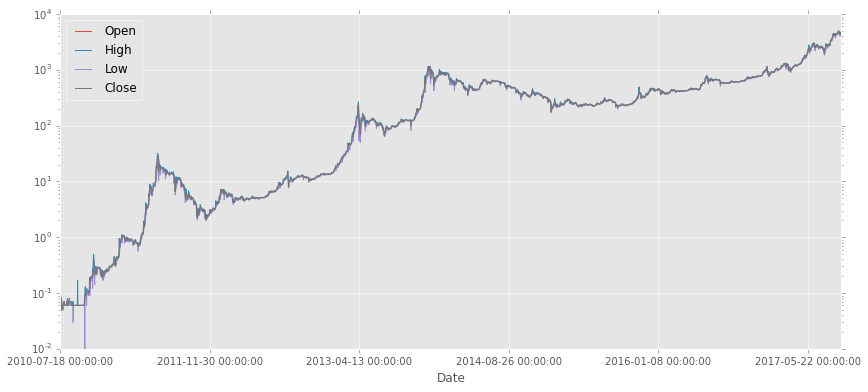

In [5]:
price.plot(logy=True);

In [6]:
price['Highest to date'] = np.array([(price.iloc[:i+1]['High']).max() for i in range(len(price))])
# price.iloc[0]['Highest to date'] = price.iloc[0]['High']
price.head()

,Open,High,Low,Close,Highest to date
Date,,,,,
2010-07-18 00:00:00,0.05,0.09,0.06,0.09,0.09
2010-07-19 00:00:00,0.09,0.09,0.08,0.08,0.09
2010-07-20 00:00:00,0.08,0.08,0.07,0.07,0.09
2010-07-21 00:00:00,0.07,0.08,0.07,0.08,0.09
2010-07-22 00:00:00,0.08,0.08,0.05,0.05,0.09


In [7]:
price['Drawdown'] = - ((price['Close'] - price['Highest to date']) / price['Highest to date']) * 100
price.head()

,Open,High,Low,Close,Highest to date,Drawdown
Date,,,,,,
2010-07-18 00:00:00,0.05,0.09,0.06,0.09,0.09,-0.000000
2010-07-19 00:00:00,0.09,0.09,0.08,0.08,0.09,11.111111
2010-07-20 00:00:00,0.08,0.08,0.07,0.07,0.09,22.222222
2010-07-21 00:00:00,0.07,0.08,0.07,0.08,0.09,11.111111
2010-07-22 00:00:00,0.08,0.08,0.05,0.05,0.09,44.444444


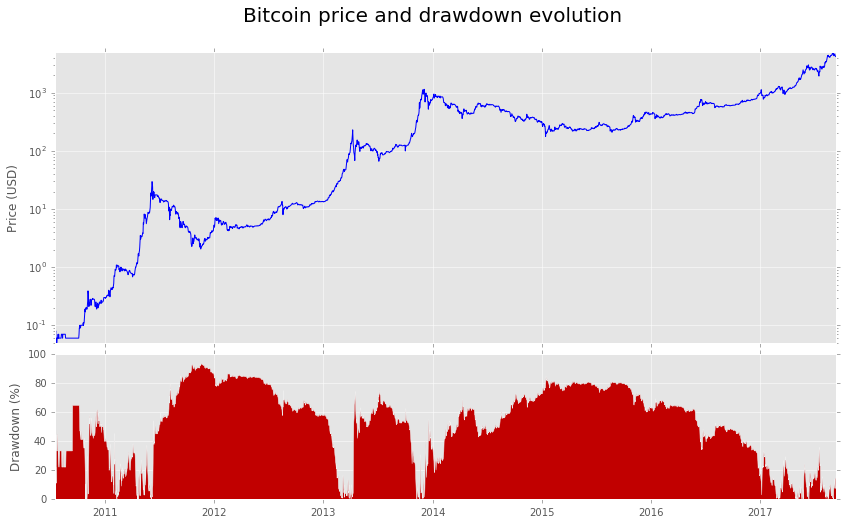

In [8]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[2, 1]}, figsize=(14, 8))

ax0.plot(pd.to_datetime(price.index), price.Close, color='b')
ax1.fill_between(pd.to_datetime(price.index), 0, price.Drawdown, facecolor='#c10000')

ax0.grid(True)
ax0.set_yscale('log')
ax0.set_ylabel('Price (USD)')
ax0.set_ylim(price.Close.min(), price.Close.max())

ax1.grid(True)
ax1.set_ylabel('Drawdown (%)')

fig.suptitle('Bitcoin price and drawdown evolution', fontsize=20) # To set the main title and its size

fig.subplots_adjust(wspace=0, hspace=0.05) # To modify the space between subplots


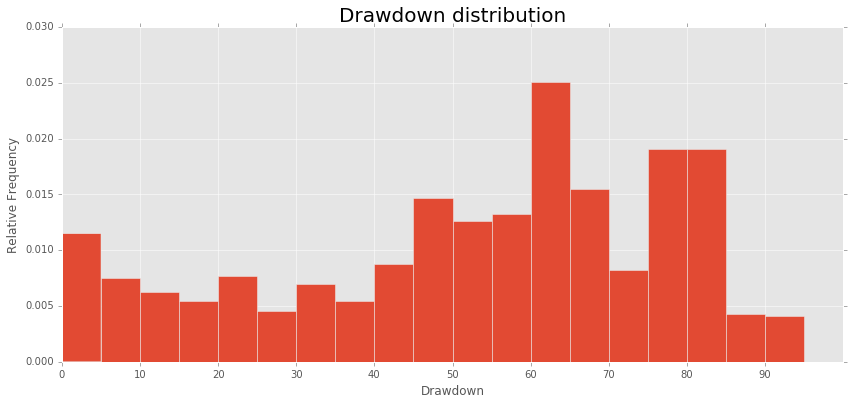

In [9]:
plt.hist(price.Drawdown.iloc[:], bins=np.arange(0, 101, 5), normed=True)
plt.title('Drawdown distribution', fontsize=20)
plt.xlabel('Drawdown')
plt.ylabel('Relative Frequency')
plt.xticks(np.arange(0, 100, 10))
plt.show()

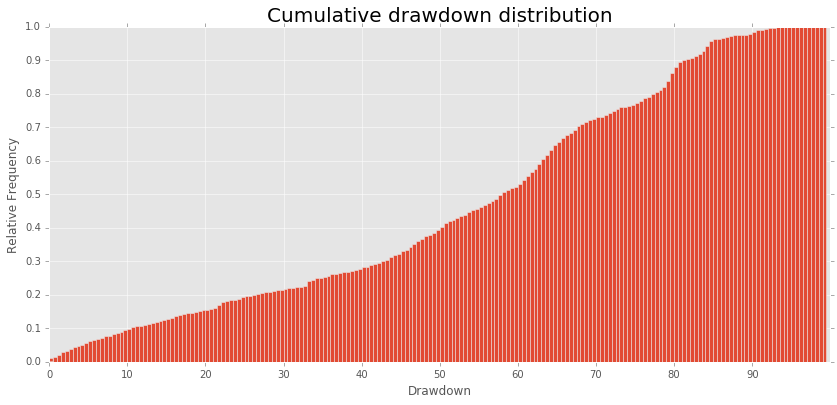

In [10]:
plt.hist(price.Drawdown, bins=np.arange(0, 100, 0.5), normed=True, cumulative=True)
plt.title('Cumulative drawdown distribution', fontsize=20)
plt.xlabel('Drawdown')
plt.ylabel('Relative Frequency')
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 1.0001, 0.1))
plt.show()

In [50]:
[(price.iloc[:i]['High']).max() for i in range(len(price))]

[nan,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.089999999999999997,
 0.08

In [56]:
%%timeit
for i, date in enumerate(price.index):
    highs = price.iloc[:i]['High']
    highest = highs.max()
#     print(date, highs.max())
    

1 loop, best of 3: 1.47 s per loop
